### Sentiment Analysis (Logistic Regression & Support Vector Machine):
#### Dataset:https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

In [1]:
import string
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm

%matplotlib inline

In [2]:
with open("full_set.txt") as f:
    content0 = f.readlines()

content = [x.strip() for x in content0]

In [3]:
### Separate the sentences from the labels
sentences = [x.split("\t")[0] for x in content]
labels = [x.split("\t")[1] for x in content]

In [4]:
## Transform the labels to '-1 v.s. 1'
y = np.array(labels, dtype='int8')
y = 2*y - 1

### Preprocessing the text data

In [5]:
#Remove punctuation and numbers
def remove_list(sentence, removal_list):
    for x in removal_list:
        sentence = sentence.replace(x,'')
    return sentence
    
digits = [str(i) for i in range(10)]
punctuations =  list(string.punctuation)

In [6]:
#Process:
sentences2 = [remove_list(x, digits) for x in sentences]

In [7]:
#Process
sentences3 = [remove_list(x, punctuations) for x in sentences2]

In [8]:
#To lower-case
sentences3 = [x.lower() for x in sentences3]

In [9]:
#Stop-Words
stop_set = set(['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from'])

def remove_stop_words(sentence,stop_set):
    result = ""
    sentence_splited = sentence.split() 
    for w in sentence_splited:
        if w not in stop_set:
            result += (w + " ")
    result = result.strip()
    return result

sentences_preprocessed = [remove_stop_words(x, stop_set) for x in sentences3]

In [10]:
sentences_preprocessed[:10]

['so there is no way for me plug in here in us unless go by converter',
 'good case excellent value',
 'great for jawbone',
 'tied charger for conversations lasting more than minutesmajor problems',
 'mic is great',
 'have jiggle plug get line up right get decent volume',
 'if you have several dozen or several hundred contacts then imagine fun sending each them one by one',
 'if you are razr owneryou must have this',
 'needless say wasted my money',
 'what waste money and time']

### Bags of words
In this representation, each word is thought of as corresponding to a number in `{1, 2, ..., V}` where `V` is the size of our vocabulary. And each sentence is represented as a V-dimensional vector $x$, where $x_i$ is the number of times that word $i$ occurs in the sentence.

In [11]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 4500)
data_features = vectorizer.fit_transform(sentences_preprocessed)

data_mat = data_features.toarray()

In [12]:
data_mat[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
data_mat.shape

(3000, 4500)

In [14]:
#Split_Data
x_train, x_test, y_train, y_test = train_test_split(data_mat, y, test_size=0.20, random_state=42)

### Logistic Regression Model

In [15]:
#Model
model = SGDClassifier(loss="log", penalty="none")
model.fit(x_train, y_train)

c:\users\blender\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
predictions = model.predict(x_test) 

In [17]:
predictions[:10]

array([ 1,  1,  1,  1, -1,  1,  1, -1, -1, -1], dtype=int8)

In [18]:
# Error on test data
tot = len(y_test)
err = np.sum((predictions != y_test))

In [19]:
print("Test error ", err/tot)

Test error  0.19833333333333333


### SVM Model:

In [20]:
def SVM_Classifier(C_ = 0.1):
    model = svm.LinearSVC(C = C_, loss="hinge")
    model.fit(x_train, y_train)
    #Predic
    preds = model.predict(x_test)
    error = np.sum((preds != y_test))/len(y_test)
    return error

In [21]:
# Test the Classifier for C = 0.1 (C: Penalty parameter C of the error term)
err_svm = SVM_Classifier()

In [22]:
print("Test error with SVM: ", err_svm)

Test error with SVM:  0.15666666666666668


### Fixing parameter C with k-fold cross-validation: Errors tracking

In [23]:
def Cross_Validation_C(x, y, C_, k):
    clf = svm.LinearSVC(C = C_, loss='hinge')
    scores = cross_val_score(clf, x, y, cv=k)
    return (1.0 - np.mean(scores)) #error

In [24]:
def error_cross_validation_c(x, y, cx, k):
    scores = []
    best_score = 1000.0
    best_c = 0.0
    for c in cx:
        score = Cross_Validation_C(x, y, c, k)
        if(score < best_score):
            best_score = score
            best_c = c
        scores.append(score)
    return scores, best_score, best_c    

### Cross-validation errors for all C values plot

In [27]:
cx =  []
for i in np.arange(-10, 10, 1):
    cx.append(10.0**(i))

scores, best_score, best_c  = error_cross_validation_c(x_train, y_train, cx, 10)

c:\users\blender\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\blender\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\blender\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\blender\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\blender\appdata\local\programs\python\python37\lib\

c:\users\blender\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\blender\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\blender\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\blender\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\blender\appdata\local\programs\python\python37\lib\

c:\users\blender\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\blender\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\blender\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\blender\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\blender\appdata\local\programs\python\python37\lib\

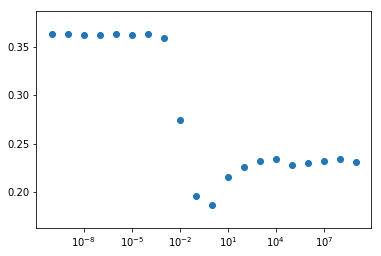

In [29]:
plt.xscale('log')
plt.scatter(cx, scores)

In [36]:
print("The best C is: {0}, the estimated cross_validation error: {1}.".format(best_c, best_score))

The best C is: 1.0, the estimated cross_validation error: 0.18665117160598865.
